In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np


In [2]:
summer_events = pd.read_csv('../Project-1/summer.csv')
winter_events = pd.read_csv('../Project-1/winter.csv')
dictionary_data = pd.read_csv('../Project-1/dictionary.csv')

country_mapping = dict(zip(dictionary_data['Code'], dictionary_data['Country']))

known_country_names =  {
    'URS': 'USSR-Prior 1992',
    'TCH': 'Czechoslovakia- Prior 1992',
    'ROU': 'Romania',
    'GDR': 'East Germany-Prior 1992',
    'EUN': 'Europe Unified Team',
    'FRG': 'Germany- Prior 1990',
    'EUA': 'Austria- pre AUT',
    'ZZX': 'Unknown',
    'ANZ': 'Australia-New Zealand',
    'BOH': 'Bohemia',
    'RU1': 'Russia',
    'YUG': 'Yugoslavia',
}

summer_events['Country Name'] = summer_events['Country'].map(country_mapping)


In [3]:
for index, row in summer_events.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            summer_events.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            summer_events.at[index, 'Country Name'] = known_country_names[country_code]

In [4]:
country_gdp_df = dictionary_data.drop(columns=['Code'])
country_gdp_df = pd.DataFrame(country_gdp_df)

track_field = summer_events.loc[(summer_events['Sport'] == 'Athletics') & (summer_events['Year'] >= 1948)]
track_field_df = pd.DataFrame(track_field)

track_field_df = track_field_df.drop(['Year','Country','Discipline','City','Sport'],axis=1)
track_field_df = track_field_df = track_field_df.reindex(columns=['Country Name','Athlete','Gender','Event','Medal'])
track_field_df = track_field_df.drop(track_field_df[track_field_df['Event'] == '4X100M Relay'].index)
track_field_df = track_field_df.drop(track_field_df[track_field_df['Event'] == '4X400M Relay'].index)

In [5]:
track_field_df.to_csv('../Project-1/track_field.csv',index=False)
track_field_df = pd.read_csv('../Project-1/track_field.csv')


In [6]:
country_medals = track_field_df.drop(['Athlete','Gender','Event','Gender'],axis=1)
country_medals = country_medals.rename(columns={'Country Name': 'Country'})

country_gold_count = country_medals.loc[(country_medals['Medal'] == 'Gold')]
country_silver_count = country_medals.loc[(country_medals['Medal'] == 'Silver')]
country_bronze_count = country_medals.loc[(country_medals['Medal'] == 'Bronze')]

gold_medal = country_gold_count.value_counts().reset_index(level=1,drop=True)
silver_medal = country_silver_count.value_counts().reset_index(level=1,drop=True)
bronze_medal = country_bronze_count.value_counts().reset_index(level=1,drop=True)

country_medals_df = pd.DataFrame({'Gold': gold_medal,'Silver': silver_medal,'Bronze': bronze_medal}).fillna(0)

country_medals_df['Total'] = country_medals_df['Gold'] + country_medals_df['Silver'] + country_medals_df['Bronze']
country_medals_df.reset_index(drop=False)

country_medals_df_2 = pd.DataFrame(country_medals_df)


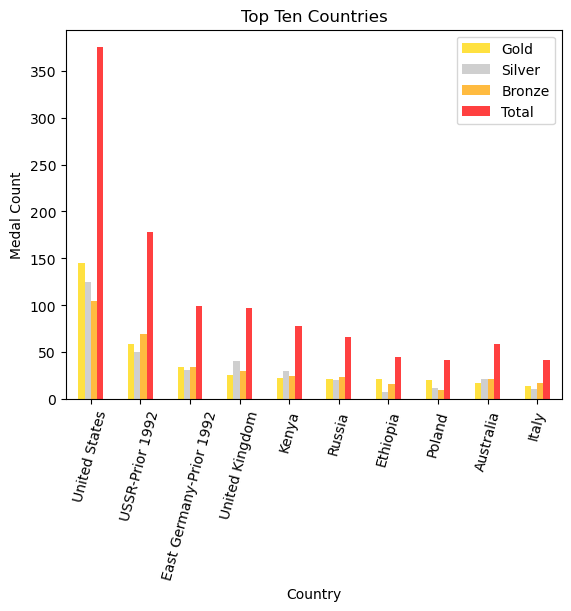

In [7]:
country_medals_df = country_medals_df.nlargest(10,{"Gold",'Silver',"Bronze"})
medal_plot = country_medals_df.plot(kind='bar',title="Top Ten Countries",ylabel='Medal Count',xlabel='Country',
                                    color=['Gold','Silver','Orange','Red'], alpha=.75,rot=75)


plt.savefig('../Project-1/top_10_medal.png', bbox_inches ='tight')


In [8]:
medal_gdp_df = pd.merge(country_medals_df_2,country_gdp_df,on='Country')

In [9]:
medal_gdp_df = medal_gdp_df.nlargest(30,['Total'])
medal_gdp_df = medal_gdp_df.dropna()
medal_gdp_df.to_csv('../Project-1/medal_dictionary.csv')

The r-squared is: 0.07978491132640554


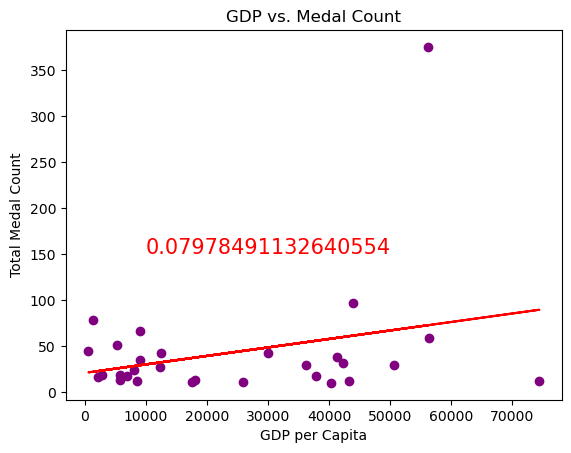

In [10]:

x_axis = medal_gdp_df['GDP per Capita']
y_axis = medal_gdp_df['Total']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis,color='purple')
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Total Medal Count')
plt.xlabel('GDP per Capita')
plt.title('GDP vs. Medal Count')
plt.annotate(rvalue**2,(10000,150),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Project-1/medal_gdp.png', bbox_inches ='tight')

plt.show()